## **ASHISH KUMAR SINGH**
## **STOCK PRICE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/Drive/MyDrive/1613615-Stock_Price_data_set.csv')

In [ ]:
data.shape

(1009, 7)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
data['Date']

0       2018-02-05
1       2018-02-06
2       2018-02-07
3       2018-02-08
4       2018-02-09
           ...    
1004    2022-01-31
1005    2022-02-01
1006    2022-02-02
1007    2022-02-03
1008    2022-02-04
Name: Date, Length: 1009, dtype: object

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


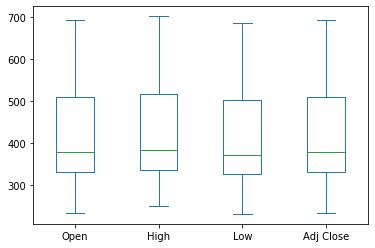

In [ ]:
data[['Open','High','Low','Adj Close']].plot(kind='box')

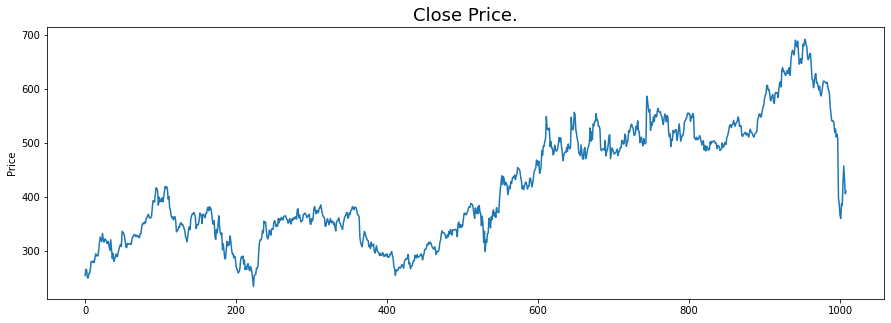

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Close Price.',fontsize=18)
plt.ylabel('Price')
plt.show()

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [ ]:
data[data['Close']==data['Adj Close']].shape

(1009, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [ ]:
data.drop(['Adj Close'],axis=1)

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

This implies there is no null value in the data set provided 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

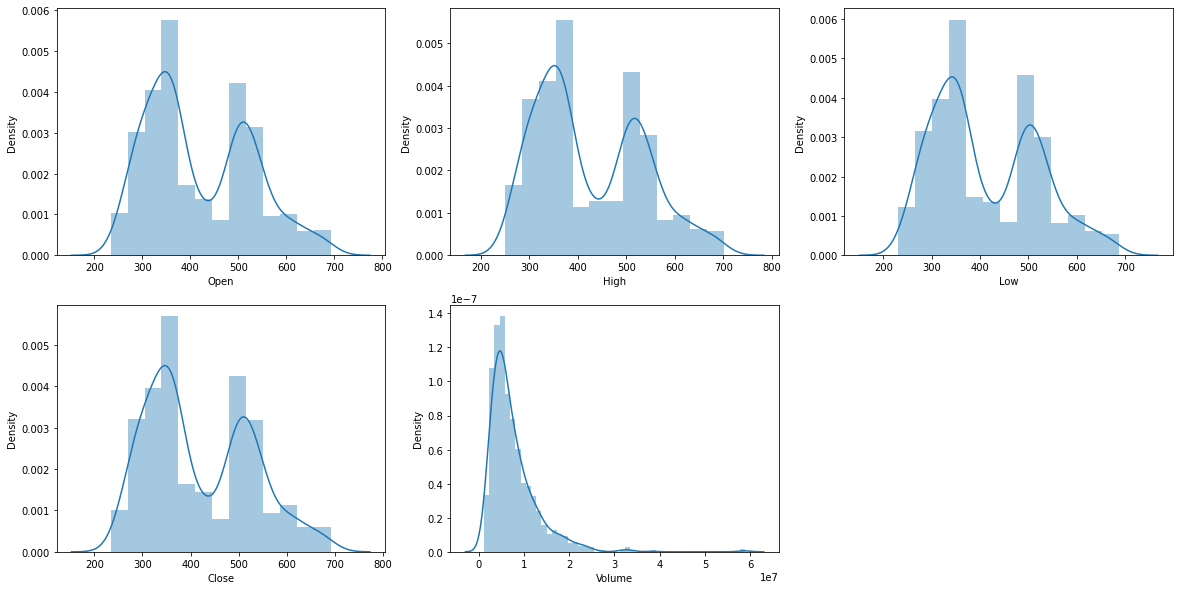

In [ ]:
#plotting some graphs
features=['Open','High','Low','Close','Volume']
plt.subplots(figsize=(20,10))

for i ,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

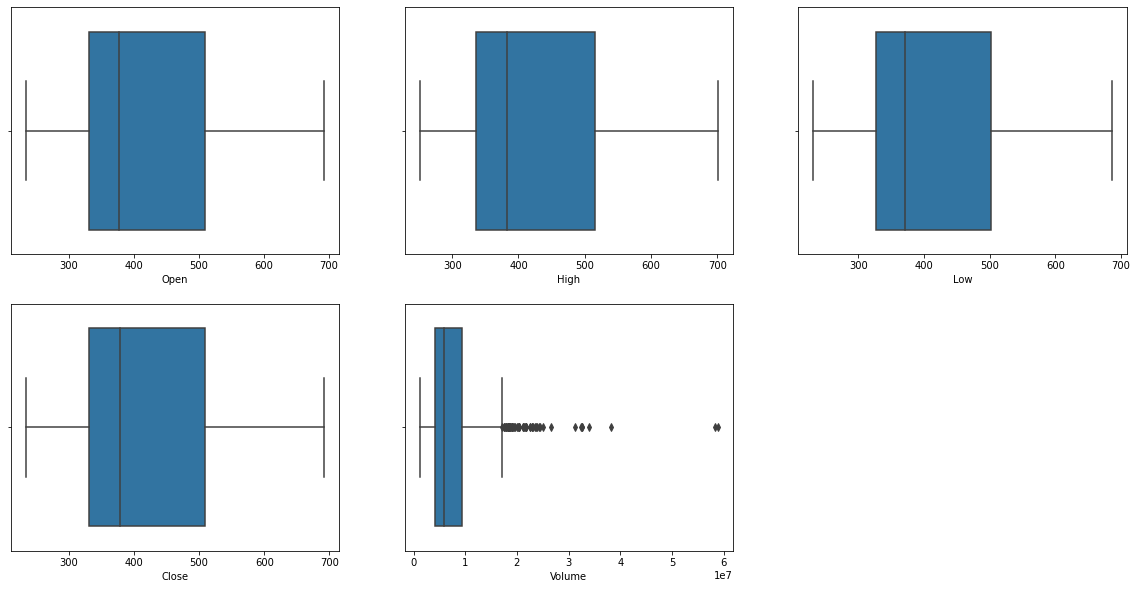

In [ ]:
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(data[col])

plt.show()

we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [ ]:
splitted = data['Date'].str.split('-', expand=True)
data['day'] = splitted[2].astype('int')
data['month'] = splitted[1].astype('int')
data['year'] = splitted[0].astype('int')



data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [ ]:
data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

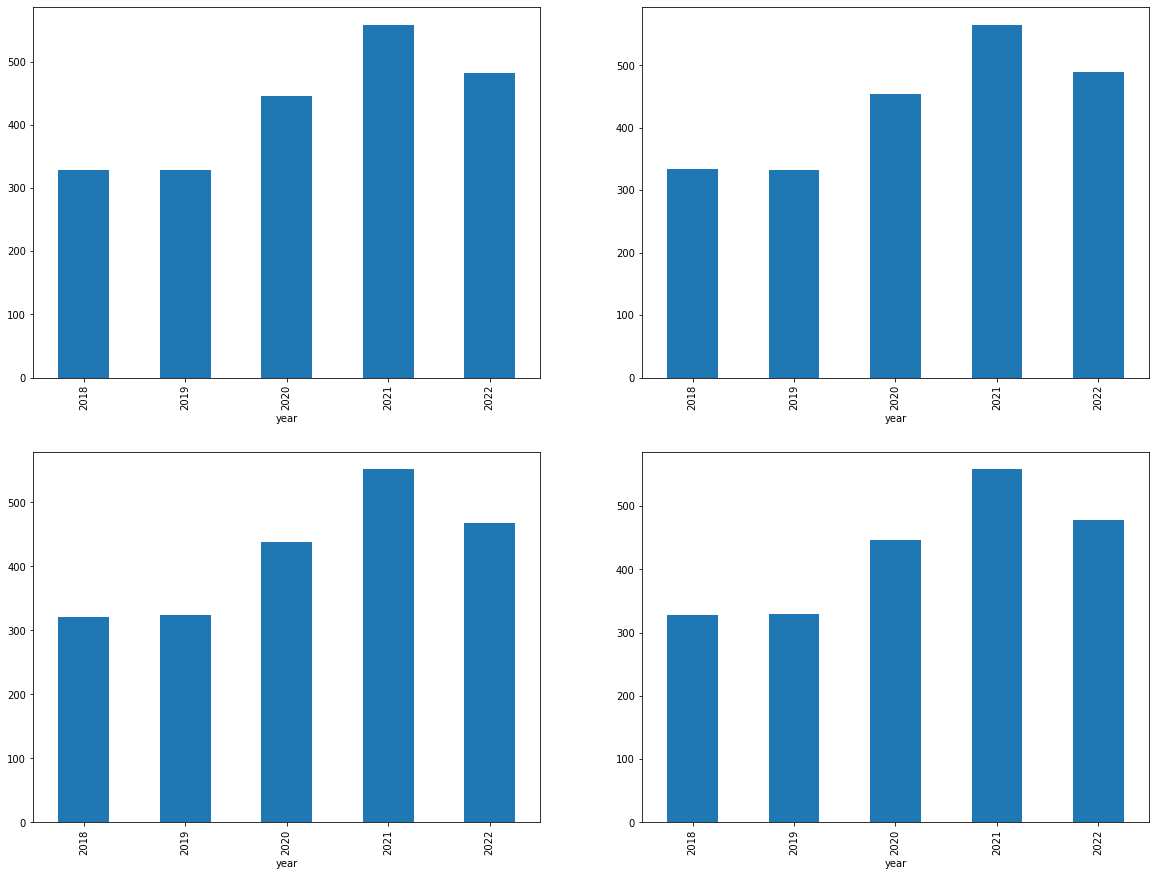

In [ ]:
data_grouped = data.groupby('year').mean()
plt.subplots(figsize=(20,15))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):

  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [ ]:
data.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


In [ ]:
data['open-close'] = data['Open'] - data['Close']
data['low-high'] = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)


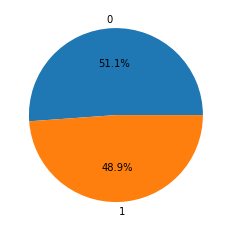

In [ ]:
plt.pie(data['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

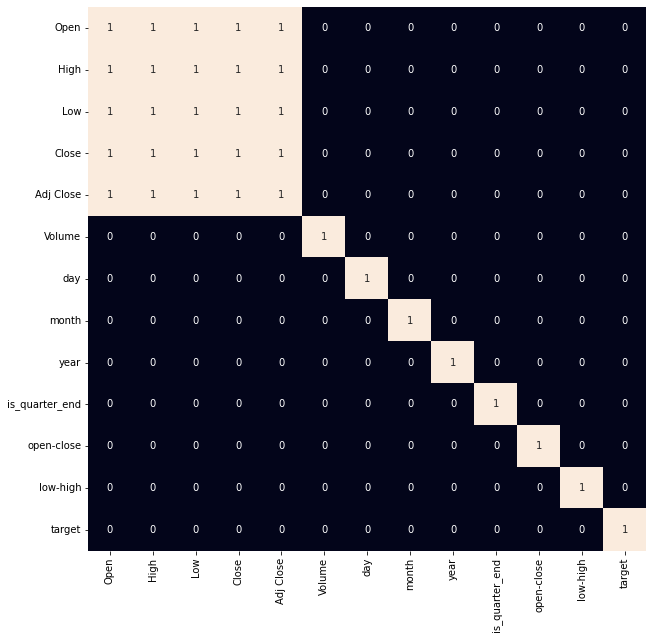

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()


From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [ ]:
#Data Splitting and Normalization
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)


(908, 3) (101, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Testing Accuracy : ', metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5406138368447911
Testing Accuracy :  0.582598235765838

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5325605696094871
Testing Accuracy :  0.4947874899759423

XGBClassifier() : 
Training Accuracy :  0.7993268693348886
Testing Accuracy :  0.60084202085004



Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the testing accuracy is  high. But in the case of the Logistic Regression, this is not the case.

Now let’s plot a confusion matrix for the testing data.


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


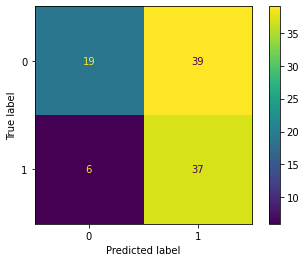

In [ ]:
metrics.plot_confusion_matrix(models[0], X_test, Y_test)
plt.show()
